In [88]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [89]:
# import packages for this example
import pandas as pd    
from collections import OrderedDict  # to create DataFrame with ordered columns
# special plotting methods
from pandas.tools.plotting import scatter_matrix    
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import metrics  # for silhouette coefficient

In [97]:
train = pd.read_csv('AMES_TRAIN_2.csv')
test = pd.read_csv('AMES_TEST_SFAM.csv')
train.columns = [s.lower() for s in train.columns]
test.columns = [s.lower() for s in test.columns]
train['qualityindex'] = (train.overallqual*train.overallcond)
train['totalsqftcalc'] = (train.grlivarea)
train['pricesqfoot'] = (train['saleprice']/train['totalsqftcalc'])
test['qualityindex'] = (test.overallqual*test.overallcond)
test['totalsqftcalc'] = (test.bsmtfinsf1+test.bsmtfinsf2+test.grlivarea)
test['pricesqfoot'] = (test['saleprice']/test['totalsqftcalc'])
train=train.replace({'totalsqftcalc': {np.NaN : 10000}})
train=train.replace({'lotarea': {np.NaN : 10000}})
train=train.replace({'lotfrontage': {np.NaN : 10000}})
test=test.replace({'totalsqftcalc': {np.NaN : 10000}})
test=test.replace({'lotarea': {np.NaN : 10000}})
test=test.replace({'lotfrontage': {np.NaN : 10000}})

In [98]:
test['Neighborhood_Group'] = np.nan
#added due to later work with Neighborhood groupings

In [99]:
train = train[train['totalsqftcalc'] < 6000]
train = train[train['saleprice'] <= 500000]
train = train[train['lotarea'] <= 25000]

In [100]:
variable_cluster_data =  train

In [101]:
kmeans = KMeans(n_clusters = 3, n_init = 25, random_state = 1)
kmeans.fit(variable_cluster_data)
cluster = kmeans.predict(variable_cluster_data)

In [102]:
variable_kmeans_solution = pd.DataFrame(OrderedDict([('cluster', cluster)]))

In [103]:
for cluster_id in sorted(variable_kmeans_solution.cluster.unique()):
    print()
    print(variable_kmeans_solution.loc[variable_kmeans_solution['cluster'] == \
        cluster_id])


      cluster
1           0
2           0
3           0
4           0
5           0
7           0
8           0
9           0
11          0
14          0
15          0
16          0
17          0
18          0
21          0
22          0
24          0
29          0
31          0
37          0
44          0
45          0
46          0
53          0
55          0
56          0
58          0
63          0
65          0
68          0
...       ...
1523        0
1525        0
1526        0
1527        0
1528        0
1529        0
1530        0
1533        0
1535        0
1538        0
1539        0
1540        0
1543        0
1545        0
1547        0
1548        0
1550        0
1552        0
1553        0
1558        0
1559        0
1560        0
1562        0
1563        0
1565        0
1566        0
1568        0
1569        0
1570        0
1571        0

[857 rows x 1 columns]

      cluster
0           1
6           1
10          1
13          1
19          1
20          1
26      

In [104]:
print('Silhouette coefficient for the five-cluster k-means solution: ', 
    metrics.silhouette_score(variable_cluster_data, cluster, 
        metric = 'euclidean'))

Silhouette coefficient for the five-cluster k-means solution:  0.5653350173942199


In [105]:
student_cluster_data =  train

In [106]:
for nclusters in range(2,21): # search between 2 and 20 clusters/segments
    kmeans = KMeans(n_clusters = nclusters, n_init = 25, random_state = 1)
    kmeans.fit(student_cluster_data)
    segment = kmeans.predict(student_cluster_data)  # cluster ids for variables
    print('nclusters: ', nclusters, ' silhouette coefficient: ', 
        metrics.silhouette_score(student_cluster_data, segment, 
            metric='euclidean'))

nclusters:  2  silhouette coefficient:  0.6529811188846508
nclusters:  3  silhouette coefficient:  0.5653350173942199
nclusters:  4  silhouette coefficient:  0.5360669172683565
nclusters:  5  silhouette coefficient:  0.5121257545947284
nclusters:  6  silhouette coefficient:  0.5099165923562458
nclusters:  7  silhouette coefficient:  0.5014681416763735
nclusters:  8  silhouette coefficient:  0.4977328369438308
nclusters:  9  silhouette coefficient:  0.4938825434775249
nclusters:  10  silhouette coefficient:  0.47982134341520194
nclusters:  11  silhouette coefficient:  0.48713456943595557
nclusters:  12  silhouette coefficient:  0.47894104699387574
nclusters:  13  silhouette coefficient:  0.46685693779511916
nclusters:  14  silhouette coefficient:  0.46813445648337604
nclusters:  15  silhouette coefficient:  0.4618045362281731
nclusters:  16  silhouette coefficient:  0.46237140826243583
nclusters:  17  silhouette coefficient:  0.464628383645208
nclusters:  18  silhouette coefficient:  0.

In [107]:
print('')
print('----- Solution for Two Student Segments -----')
print('')
kmeans = KMeans(n_clusters = 2, n_init = 25, random_state = 1)
kmeans.fit(student_cluster_data)
segment = kmeans.predict(student_cluster_data)  # cluster index


----- Solution for Two Student Segments -----



In [108]:
student_kmeans_solution = pd.DataFrame(OrderedDict(
    [('student', range(0,len(student_cluster_data))),
    ('segment', segment)]))

In [109]:
student_segmentation_data = student_kmeans_solution.join(train)

In [110]:
centers = kmeans.cluster_centers_
centers=centers.T
# turn centers into a df so we can plot the results 
d1 = pd.DataFrame({'zero': centers[:,0]})
d2 = pd.DataFrame({'one': centers[:,1]})
d = d1.join(d2) #column zero and one will be the two groups

In [111]:
def qhist(dataframe,var1 ):     
    dataframe[var1].hist(facecolor='b',bins=range(2,8,1))     
    plt.title('Histogram of '+var1)     
    plt.xlabel(var1)     
    plt.ylabel('Frequency')

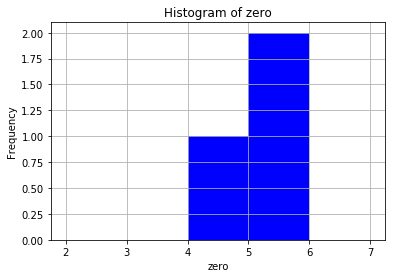

In [112]:
qhist(d,'zero')

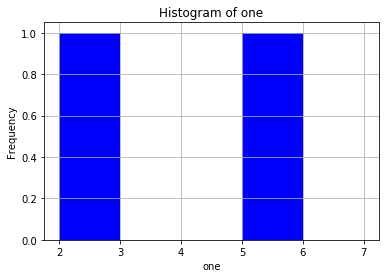

In [113]:
qhist(d,'one')

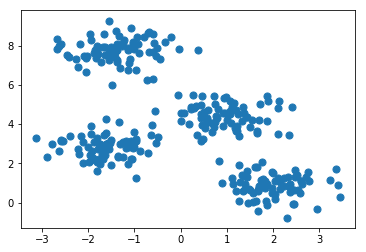

In [114]:
from sklearn.datasets.samples_generator import make_blobs
X,y_true = make_blobs(n_samples=300,centers=4,cluster_std=.60,random_state=0)
plt.scatter(X[:, 0],X[:, 1], s=50);  
 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X) 
y_kmeans = kmeans.predict(X)


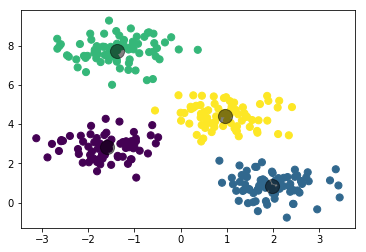

In [115]:
centers = kmeans.cluster_centers_
plt.scatter(X[:,0],X[:,1], c = y_kmeans, s=50, cmap = 'viridis') 
plt.scatter(centers[:,0],centers[:,1], c='black',s=200,alpha=0.5);

In [ ]:
model1 = smf.ols(formula='saleprice ~ qualityindex+totalsqftcalc+C(lotconfig)+C(neighborhood)+C(housestyle)+yearbuilt+C(roofstyle)+C(heating)', data=train).fit()
model1.summary()

In [ ]:
predictions_1 = model1.fittedvalues
predictions_1.head()

In [ ]:
test_predictions_1 = model1.predict(test)
d = {'p_saleprice': test_predictions_1}
df1 = test[['index']]
df2=pd.DataFrame(data=d)
Strouse_TestPredictions_1 = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])
Strouse_TestPredictions_1.head()

In [ ]:
Strouse_TestPredictions_1.to_csv('logan_strouse_HW2_MODEL_1_NBGROUP.csv')